# E-commerce

This notebook explores a hypothetical dataset for an e-commerce website and look to predict customer purchasing intentions. It looks at the features Administrative, Administrative Duration, Informational, Informational Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay, Month, OperatingSystems, Browser, Region, TrafficType, VisitorType and Weekend. In an attempt to predict if it will lead to returning revenue Revenue, which is a boolean value of true for a purchase and false for no purchase.

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
from string import ascii_letters
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta 
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

%matplotlib inline
sns.set_style("whitegrid")

# Loading and exploring the data

In [2]:
# create dataframe
df = pd.read_csv('e_commerce_data.csv')

# Summary of data
print(df.shape, '\n')
print(df.info(), '\n')
df.describe()

(12330, 18) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficT

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## Distribution of revenue

C:\Users\Charlie\Anaconda3\envs\DASA\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


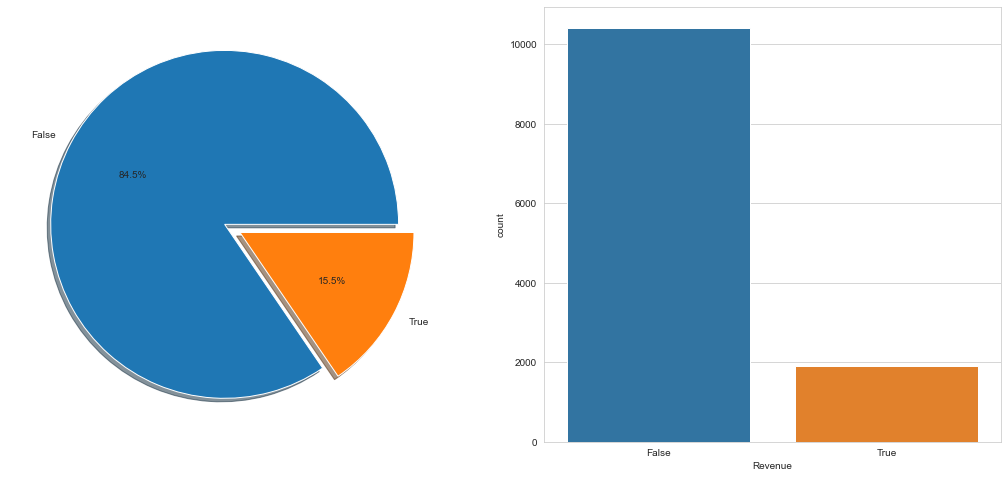

In [3]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
df['Revenue'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
#ax[0].set_title('Revenue')
ax[0].set_ylabel('')
sns.countplot('Revenue',data=df,ax=ax[1])
#ax[1].set_title('Revenue')
plt.show()

## Operating system

In [4]:
df['OperatingSystems'].unique()

array([1, 2, 4, 3, 7, 6, 8, 5], dtype=int64)

C:\Users\Charlie\Anaconda3\envs\DASA\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


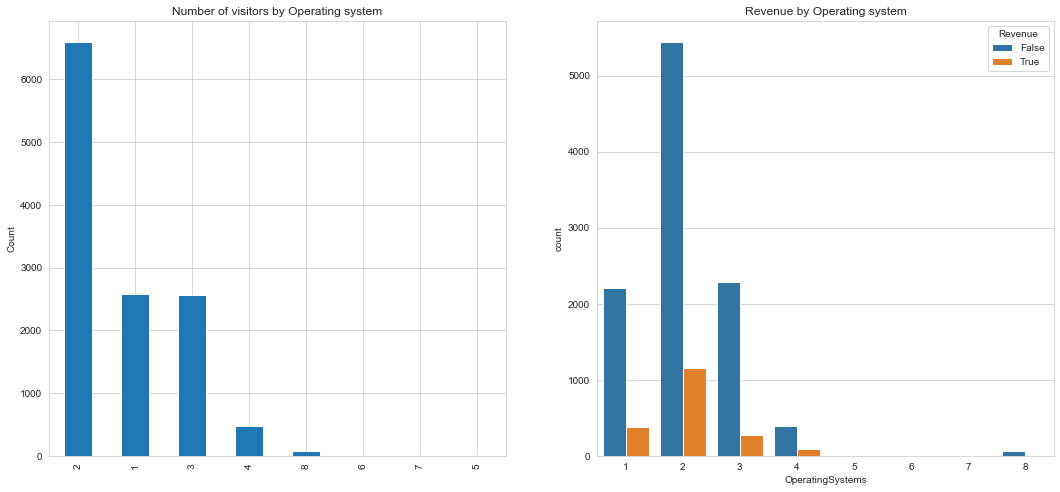

In [5]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
df['OperatingSystems'].value_counts().plot.bar(ax=ax[0]) 
ax[0].set_title('Number of visitors by Operating system')
ax[0].set_ylabel('Count')
sns.countplot('OperatingSystems',hue='Revenue',data=df,ax=ax[1])
ax[1].set_title('Revenue by Operating system')
plt.show()

## Weekends and Visitor types

In [6]:
pd.crosstab([df['Revenue'],df['Weekend']],df['VisitorType'],margins=True).style.background_gradient(cmap='summer_r')

It seems as though revenue is not significantly affected by the weekend and that the increased number of revenues during the week could be explained by the difference in number of weekdays to days at the weekend, 5:2.

C:\Users\Charlie\Anaconda3\envs\DASA\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


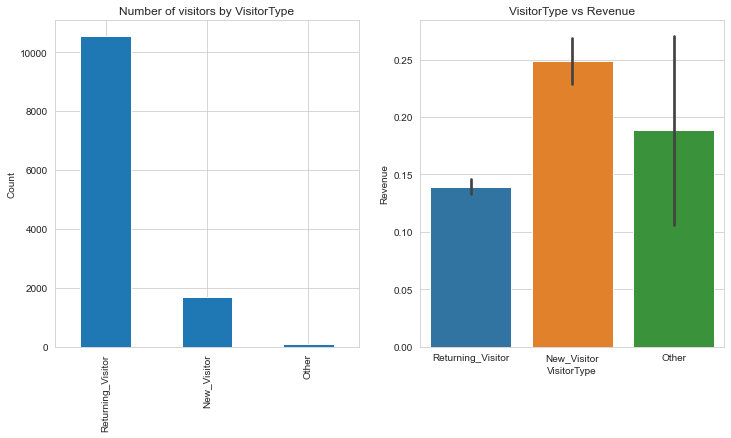

In [7]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
df['VisitorType'].value_counts().plot.bar(ax=ax[0]) 
ax[0].set_title('Number of visitors by VisitorType')
ax[0].set_ylabel('Count')
sns.barplot('VisitorType','Revenue',data=df, ax=ax[1])
ax[1].set_title('VisitorType vs Revenue')
plt.show()

## Continous variables

In [8]:
# From provided feature descriptions
categorical_features = ['Month', 'OperatingSystems', 'Browser', 
                       'Region', 'TrafficType', 'VisitorType',
                       'Weekend']

numerical_features = ['Administrative', 'Administrative_Duration', 'Informational',
                     'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                     'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

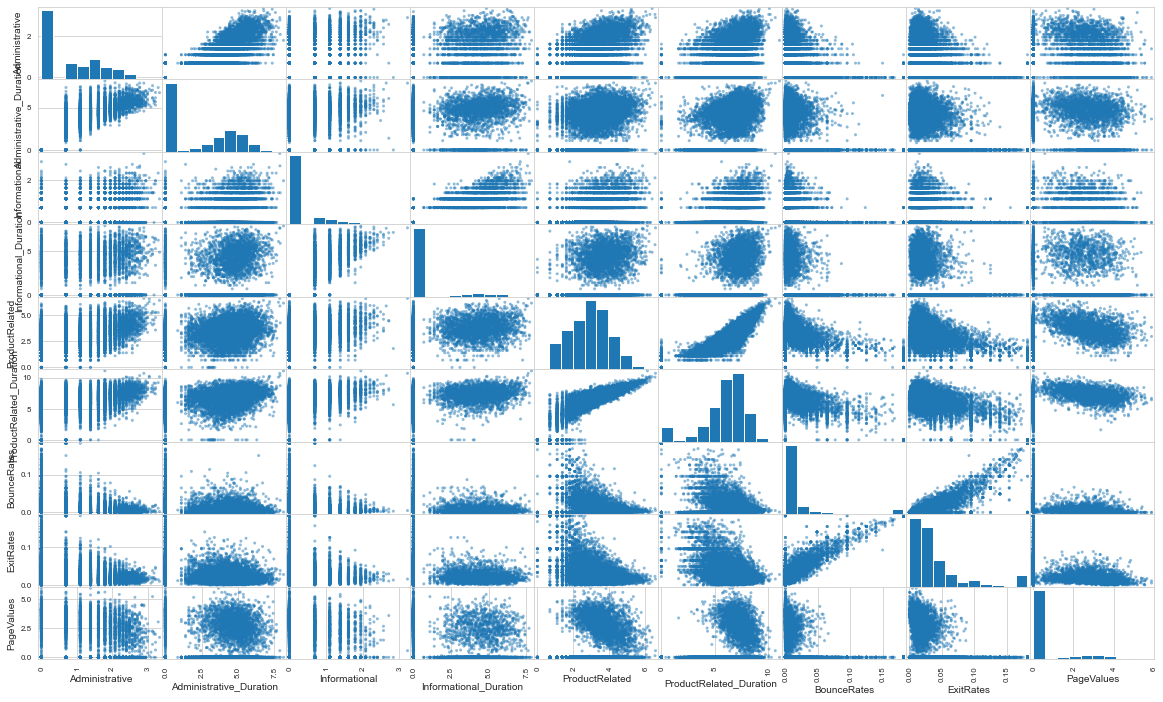

In [9]:
# scatter matrix of numeric data
scatter_matrix(np.log(df[numerical_features[:-1]]+1), figsize=(20, 12))
plt.show()

it seems much of the data such as administration and informational take a small range of descrite quantities, as expected for data type int. Most features are not that strongly correlated with one another.

It is clear the data suffers from some extreme outliers affecting certain features this is particularly relevant in duration related columns.

## Potential outliers

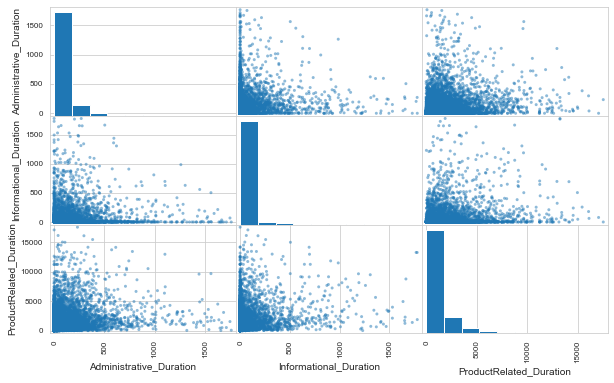

In [10]:
outlier_columns=['Administrative_Duration','Informational_Duration','ProductRelated_Duration']

# remove outliers and log data
df_outliers = df[outlier_columns][(df['Administrative_Duration'] < 1800) & (df['Informational_Duration'] < 1800) & (df['ProductRelated_Duration'] < 18000)] 

#re plot
scatter_matrix(df_outliers, figsize=(10, 6))
plt.show()

In [11]:
df_outliers.shape

(12305, 3)

In [12]:
print(f"The maximum time in Administrative_Duration {round(max(df['Administrative_Duration'])/60, 2)} minutes")
print(f"The maximum time in Informational_Duration {round(max(df['Informational_Duration'])/60, 2)} minutes")
print(f"The maximum time in ProductRelated_Duration {round(max(df['ProductRelated_Duration'])/3600, 2)} hours")

The maximum time in Administrative_Duration 56.65 minutes
The maximum time in Informational_Duration 42.49 minutes
The maximum time in ProductRelated_Duration 17.77 hours


The data has outliers of over half an hour in the informational and duration pages removed as it is assumed the user is idle, product related duration has a higher cut off of 5 hours. The results of this are then tranformed using log(x+1), the resultant scatter plots now show a much better and more normal distribution which will help with model trainning. Though in all cases there is still a large number of zero values recorded.

## Correlations

<AxesSubplot:>

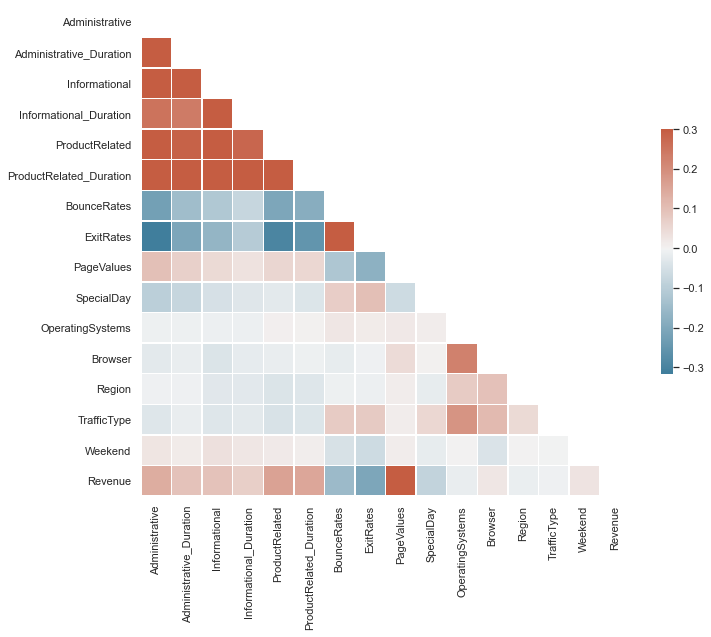

In [13]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The correlation plot shows some results that are rather expected, such as th number of pages vistited increases the duration. Interestinly page views and duration have a positive correlation with revenue, whilst time away from a special day, bounce rates and exit rates are negativley correlated. Unsuprisingly the categorical columns have no relevelnt correlations.

# Pre-processing

Split the data pre-processing to prevent a data leakage. As the data has extreme values, scaling the data pre-splitting the data will mean the can be affected by outliers in the trainning set.

In [14]:
# Features and target
X = df[df.columns[:-1]] 
y = df['Revenue']

def process_data(X, y):
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Split Data

Splitting data pre transforms to prevent any data leakage.

In [15]:
# Features and target
X = df[df.columns[:-1]] 
y = df['Revenue']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Remove outliers

In [16]:
# create copies of the data
df_outliers = X_train.copy()
df_outliers['Revenue'] = y_train.copy()
print('Original dataset size: y:', y_train.shape, 'X:', X_train.shape)
print(Counter(y_train))

# set boundaries
df_outliers = df_outliers[(df_outliers['Administrative_Duration'] < 1800) & (df_outliers['Informational_Duration'] < 1800) & (df_outliers['ProductRelated_Duration'] < 18000)]  

# split features and target
y_train = df_outliers['Revenue']
X_train = df_outliers[df_outliers.columns[:-1]]
print('Reduced dataset size: y:', y_train.shape, 'X:', X_train.shape)
print(Counter(y_train))

Original dataset size: y: (9864,) X: (9864, 17)
Counter({False: 8367, True: 1497})
Reduced dataset size: y: (9846,) X: (9846, 17)
Counter({False: 8351, True: 1495})


### Data balancing - oversampling SMOTE

In [17]:
def balancingClassesSmote(x_train, y_train):
    print(f"Original dataset shape {Counter(y)}")
    print(f"Trainning count for each class value before SMOTE: {Counter(y_train)}")
    
    # Using SMOTE to to balance our training data points
    sm = SMOTE(random_state=7)
    features_balanced, target_balanced = sm.fit_resample(x_train, y_train)
    print(f"Trainning count for each class value after SMOTE: {Counter(target_balanced)}")

    return features_balanced, target_balanced

### Pipelines

In [18]:
# transformer for categorical features
categorical_transformer = Pipeline(
    [
        ('onehot', OneHotEncoder(handle_unknown = 'error', drop='first', sparse=False))
    ]
)

# transformer for numerical features
numeric_transformer = Pipeline(
    [
        ('scaler', StandardScaler()),
    ]
)

# combine them in a single ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numerical_features)        
    ],
    remainder = 'drop'
)

preprocessor.fit(X_train)
X_train.shape

(9846, 17)

## Transform training data
So transforming both should be indepenendt to prevent leakage, however some of the test cases lack values fround in the training set, so when encoding a different number of features are created. Solution maybe stratified splitting of the data.

In [19]:
# transform and balance
X_train_processed = preprocessor.transform(X_train)
X_train_pro_bal, y_train_pro_bal = balancingClassesSmote(X_train_processed, y_train)
print(f"trainning data shape: {X_train_pro_bal.shape}")

# tranform train
X_test_processed = preprocessor.transform(X_test)
print(f"trainning data shape: {X_test_processed.shape}")

Original dataset shape Counter({False: 10422, True: 1908})
Trainning count for each class value before SMOTE: Counter({False: 8351, True: 1495})
Trainning count for each class value after SMOTE: Counter({False: 8351, True: 8351})
trainning data shape: (16702, 68)
trainning data shape: (2466, 68)


# Modelling

## RandomForest

In [20]:
# were used in practice-commented out for ease of use
# parameters = {
#     'n_estimators': [x for x in range(50,600,100)], 
#     'min_samples_leaf':[1, 2],
#     'min_samples_split':[2,5]
# }

# Best results of searching the above parameters
parameters = {
    'n_estimators': [250], 
    'min_samples_leaf':[1],
    'min_samples_split':[2]
}

forest_clf = GridSearchCV(RandomForestClassifier(), parameters, cv=3, verbose=2, n_jobs=-1, scoring='f1')
forest_clf.fit(X_train_pro_bal, y_train_pro_bal.values.flatten())
print(forest_clf.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.0s finished


{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}


In [21]:
y_pred = forest_clf.predict(X_test_processed)
print(f"roc_auc-Score: {round(roc_auc_score(y_test, y_pred), 3)}")
print(classification_report(y_test, y_pred))
print(f"f1-Score: {round(f1_score(y_test, y_pred), 3)}")

roc_auc-Score: 0.801
              precision    recall  f1-score   support

       False       0.93      0.94      0.94      2055
        True       0.68      0.66      0.67       411

    accuracy                           0.89      2466
   macro avg       0.81      0.80      0.80      2466
weighted avg       0.89      0.89      0.89      2466

f1-Score: 0.672


Text(0, 0.5, 'True positive rate')

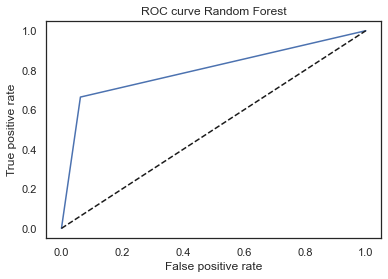

In [22]:
fpr,tpr,threshold = roc_curve(y_test, y_pred)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'k--')
plt.title("ROC curve Random Forest")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

## Logistic regression

In [23]:
# were used in practice-commented out for ease of use
# parameters = {
#     'penalty' :['l1', 'l2', 'elasticnet'], 
#     'solver':['newton-cg', 'lbfgs','sag', 'saga']
# }

# Best results of searching the above parameters
parameters = {
    'penalty' :['l1'], 
    'solver':['saga']
}

logistic_clf = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), 
                            parameters, cv=3, verbose=2, n_jobs=-1, scoring='f1')
logistic_clf.fit(X_train_pro_bal, y_train_pro_bal.values.flatten())
print(logistic_clf.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.7s finished


{'penalty': 'l1', 'solver': 'saga'}


In [24]:
y_pred = logistic_clf.predict(X_test_processed)
print(f"roc_auc-Score: {round(roc_auc_score(y_test, y_pred), 3)}")
print(classification_report(y_test, y_pred))
print(f"f1-Score: {round(f1_score(y_test, y_pred), 3)}")

roc_auc-Score: 0.815
              precision    recall  f1-score   support

       False       0.95      0.87      0.91      2055
        True       0.55      0.75      0.63       411

    accuracy                           0.85      2466
   macro avg       0.75      0.81      0.77      2466
weighted avg       0.88      0.85      0.86      2466

f1-Score: 0.634


Text(0, 0.5, 'True positive rate')

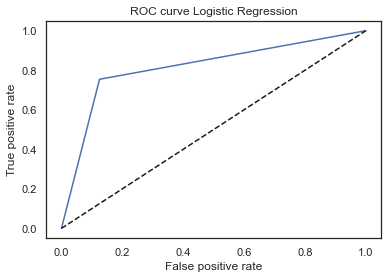

In [25]:
fpr,tpr,threshold = roc_curve(y_test, y_pred)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'k--')
plt.title("ROC curve Logistic Regression")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

## XGBoost

In [26]:
from xgboost import XGBClassifier

# were used in practice-commented out for ease of use
# parameters = {
#     'gamma' :[0,0.1,0.5,1], 
#     'max_depth':[5,10,15],
#     'n_estimators':[100,150,200,250],
#     'min_child_weight':[1,2,3]
# }

# Best results of searching the above parameters
parameters = {
    'gamma' :[0], 
    'max_depth':[15],
    'n_estimators':[100],
    'min_child_weight':[1]
}

xgb_clf = GridSearchCV(XGBClassifier(use_label_encoder=False), parameters, cv=3, verbose=2, n_jobs=-1, scoring='f1')
xgb_clf.fit(X_train_pro_bal, y_train_pro_bal.values.flatten())
print(xgb_clf.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.0s finished


[22:40:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'gamma': 0, 'max_depth': 15, 'min_child_weight': 1, 'n_estimators': 100}


In [27]:
y_pred = xgb_clf.predict(X_test_processed)
print(f"roc_auc-Score: {round(roc_auc_score(y_test, y_pred), 3)}")
print(classification_report(y_test, y_pred))
print(f"f1-Score: {round(f1_score(y_test, y_pred), 3)}")

roc_auc-Score: 0.787
              precision    recall  f1-score   support

       False       0.93      0.94      0.93      2055
        True       0.67      0.64      0.65       411

    accuracy                           0.89      2466
   macro avg       0.80      0.79      0.79      2466
weighted avg       0.89      0.89      0.89      2466

f1-Score: 0.653


Text(0, 0.5, 'True positive rate')

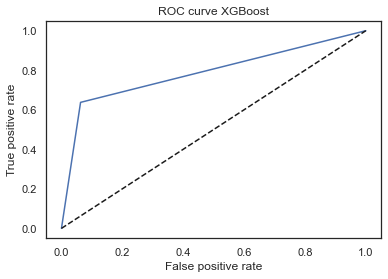

In [28]:
fpr,tpr,threshold = roc_curve(y_test, y_pred)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'k--')
plt.title("ROC curve XGBoost")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

# Result analysis
All models performed differently, positively all models were able to correctly
classify the true class at a rate of better than 50
Precision is the proportion of true values predicted that were actually
true and the recall the proportion of true values correctly classified. For the
use case of predicting revenue, it isn't a situation where either of these is
significantly more important than the other. Where as in medical diagnosis
high precision is more important. So a balance between the precision and
recall is acceptable.

The random forest as expected had a high accuracy of 89%, however,
the f1 score was much lower at 67%. The results show the model was sig-
nicantly better in terms of both precision and recall at predicting a False
class by comparison with a True, however, the model favoured neither high
precision or recall. Logistic regression performs quite differently to the other
models and has a significantly higher recall to the precision of 77% to 55%
respectively. The accuracy of the model is again high at 85% and the f1 score
is balanced by the strong recall and weak precision to a score of 67% as well.
XGBoost has a very similar performance to the Random forest model, while
both models have similarities it was expected the XGBoost would perform
the better of the two, the only significant diference between their results is
the precision is slightly higher while the recall is slightly lower.

To conclude it appears the models are fnding it diffcult to correctly
classify cases of revenue being True. One potential reason for this could be
with the data and the pre-processing applied as none of the model types
appears to be significantly better than the rest. Further data processing is
recommended to improve performance.
5